In this kernel, I will be using the **Stack Overflow Developer Survey Results 2019** data set to find out the current trends going on in the Software Industry 

In [1]:
# Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Some settings regarding display of rows and columns in pandas
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',800)
sns.set_style("whitegrid") # Setting the style of seaborn grid
#importing the data
data=pd.read_csv('input/stack-overflow-developer-survey-results-2019/survey_results_public.csv')
data.shape

(88883, 85)

Wow, the dataset contains over 85 columns, the description of which are available in survey_results_schema.csv. Let's work on understanding each column and dropping those columns which are not required for our analysis

In [2]:
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [3]:
data.drop(columns=['BetterLife', 'ITperson', 'OffOn',
                   'SocialMedia','Extraversion',
                   'ScreenName', 	'SOVisit1st','SOVisitFreq','SOVisitTo',
                   'SOFindAnswer', 	'SOTimeSaved', 	'SOHowMuchTime', 
                   'SOAccount','SOPartFreq','SOJobs','EntTeams', 'SOComm',
                   'WelcomeChange','SONewContent','Age','Gender','Trans' ,
                   'Sexuality',
                   'Ethnicity', 'Dependents', 'SurveyLength' ,'SurveyEase'],
          inplace=True)
data.drop(columns=['Respondent','LastHireDate'
                   ,'FizzBuzz','ResumeUpdate',
                   'CurrencySymbol','CurrencyDesc','CompTotal',
                   'CompFreq','ImpSyn'],inplace=True)

After reading about each column in the schema csv file, i found some columns which are not required for my analysis and therefore I dropped them.

In [4]:
# Columns after deletion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 49 columns):
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61159 non-null object
MgrMoney                  6

# Let's see the column MainBranch
Description:-Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."

In [5]:
data['MainBranch'].value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

In [6]:
data['MainBranch']=data['MainBranch'].replace({'I am a developer by profession':'Developer',
                                              'I am a student who is learning to code':'Student',
                                              'I am not primarily a developer, but I write code sometimes as part of my work':'Not a developer',
                                            'I code primarily as a hobby':'Code as hobby',
                                            'I used to be a developer by profession, but no longer am':'No more a developer'})

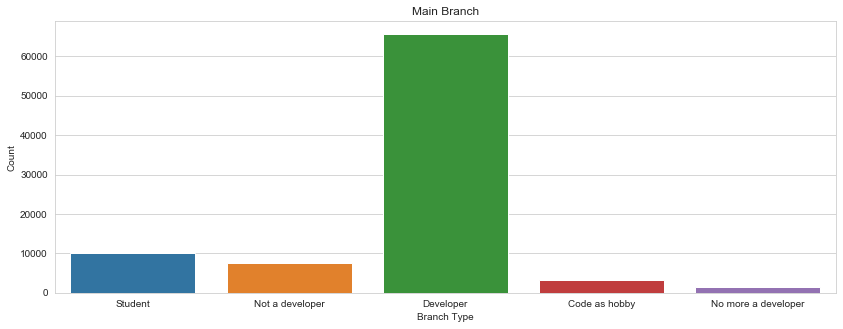

In [7]:
_ = plt.figure(figsize=(14,5))
_ = plt.title('Main Branch')
g = sns.countplot(x='MainBranch',data=data)
_ = plt.xlabel('Branch Type',fontsize=10)
_ = plt.ylabel('Count')
plt.show()

Since our analysis is on the developers, therefore we will filter the data to contain only developers

In [8]:
data_dev = data[data['MainBranch'] == 'Developer'].copy()

In [9]:
data_dev['MainBranch'].value_counts()

Developer    65679
Name: MainBranch, dtype: int64

Now we got all the data of developers, let's move on and check how many developers code as hobby.

# Let's see how many professional developers have mentioned coding as their hobby

In [10]:
data_dev['Hobbyist'].value_counts()

Yes    52008
No     13671
Name: Hobbyist, dtype: int64

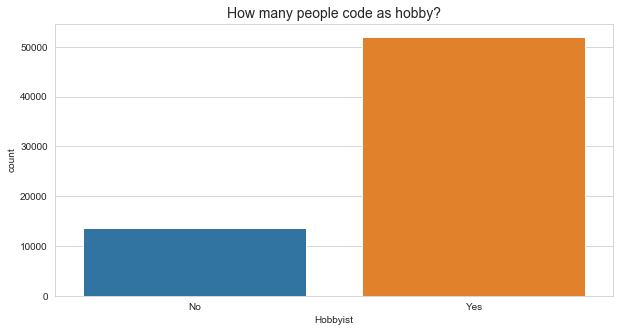

In [11]:
_ = plt.figure(figsize=(10,5))
_ = plt.title('How many people code as hobby?',fontsize=14)
g = sns.countplot(x='Hobbyist',data=data_dev)
_ = plt.show()

Wow! Seeing the above graph, we can see that large number of developers actually love coding and it is their hobby. As it is said, make a career in a thing you love, then work becomes a play :)

# OpenSourcer
Description -  this columns contains the data of how often people in the data contribute towards open source.
Before proceeding with analysis, Let us first know what a open source software is:-
**A open source software is one for which the original source code is made freely available and may be redistributed and modified.**

Let us now see how many developers contribute to open source.

In [12]:
data_dev['OpenSourcer'].value_counts()

Never                                                 22373
Less than once per year                               19319
Less than once a month but more than once per year    15988
Once a month or more often                             7999
Name: OpenSourcer, dtype: int64

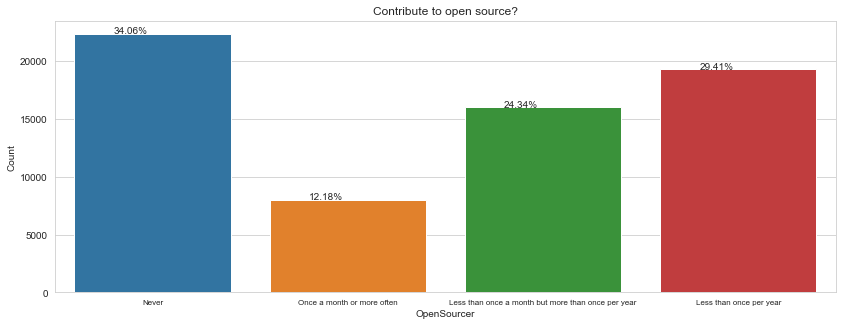

In [13]:
total_data_in_open_sourcer = len(data_dev['OpenSourcer'].dropna())
_=plt.figure(figsize=(14,5))
_=plt.title('Contribute to open source?')
_=plt.xticks(fontsize=8)
g=sns.countplot(x='OpenSourcer',data=data_dev)
for i in g.patches:
    _=g.text(i.get_x()+.2,i.get_height()+.3,str(round((i.get_height()/total_data_in_open_sourcer)*100,2))+'%')
_=plt.ylabel('Count')
_=plt.show()

From the graph, we can infer that most of the developers haven't ever contributed to open source or have done it less than once per year. wish we could find out the reason why developers majority of the developers don't contribute to open source. 

**How developers feel about the quality of open source software?**

In [14]:

data_dev['OpenSource'].replace({'The quality of OSS and closed source software is about the same':'Almost the same',
                               'OSS is, on average, of HIGHER quality than proprietary / closed source software':'OSS is of higher quality',
                               'OSS is, on average, of LOWER quality than proprietary / closed source software':'OSS is of lower quality'},
                              inplace=True)

In [15]:
data_dev['OpenSource'].value_counts()

Almost the same             31087
OSS is of higher quality    27259
OSS is of lower quality      6154
Name: OpenSource, dtype: int64

# Analysis of status of employment of the developers as per the records

In [16]:
data_dev['Employment'].replace({'Employed full-time':'Employed','Not employed, but looking for work':'Not Employed',
                               'Independent contractor, freelancer, or self-employed':'Employed',
                               'Not employed, and not looking for work':'Not Employed','Employed part-time':'Employed'},inplace=True)

data_dev_employment=data_dev.dropna(subset=['Employment'])
# We have replaced each category by Employed and Not Employed.

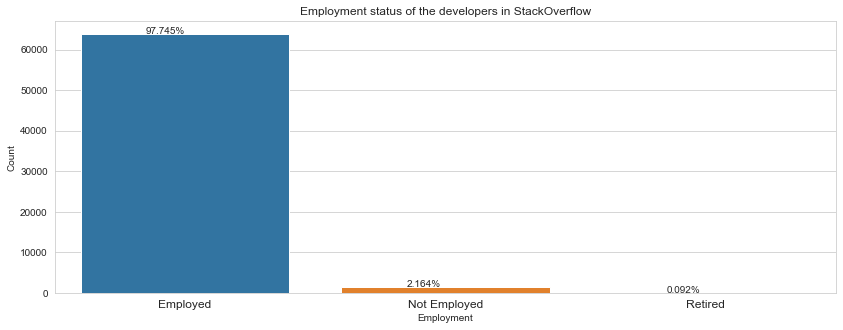

In [17]:
employment_records = len(data_dev_employment['Employment'])
_ = plt.figure(figsize=(14,5))
_ = plt.title('Employment status of the developers in StackOverflow')
g = sns.countplot(x='Employment',data=data_dev_employment)
for i in g.patches:
    _ = g.text(i.get_x()+.25,i.get_height()+.3,str(round((i.get_height()/employment_records)*100,3))+'%')
_ = plt.ylabel('Count')
_ = plt.xticks(fontsize=12,rotation=0)

Good to know that majority of people who participated in the survey are employed.  
Let's now see the employment status country wise. (Top 10 countries having most number of employed, and not employed people)

## Number of surveys recorded from each country?
only top 10 countries with most number of surveyees

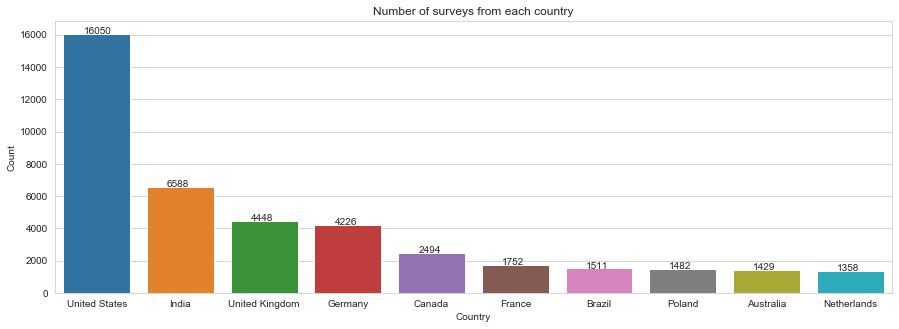

In [18]:
country_data=data_dev_employment.groupby('Country').size().sort_values(ascending=False).head(10)
country = country_data.index.tolist()
values = country_data.values.tolist()

_ = plt.figure(figsize=(15,5))
_ = plt.title('Number of surveys from each country')
g = sns.barplot(x=country,y=values)
for i in g.patches:
    _ = g.text(i.get_x()+.24,i.get_height()+.38,str(int(round(i.get_height(),0))))
_ = plt.xlabel('Country')
_ = plt.ylabel('Count')


In [19]:
# data_dev_employment=data_dev[(data_dev['Employment']=='Employed') |
#                           (data_dev['Employment']=='Self Employed') | 
#                           (data_dev['Employment']=='Not Employed')]
# # data_dev_employment consists only data of employed, self employed, and
# # not employed people.

## Let's see the percentage of developers employed in each Country in a bar graph

In [20]:
data_dev_employed=data_dev_employment[data_dev_employment['Employment']=='Employed'].\
groupby('Country')['MainBranch'].count().sort_values(ascending=False).head(10)
# contains data of only employed people grouped country wise

In [21]:
country = data_dev_employed.index.tolist()
values = data_dev_employed.values.tolist()

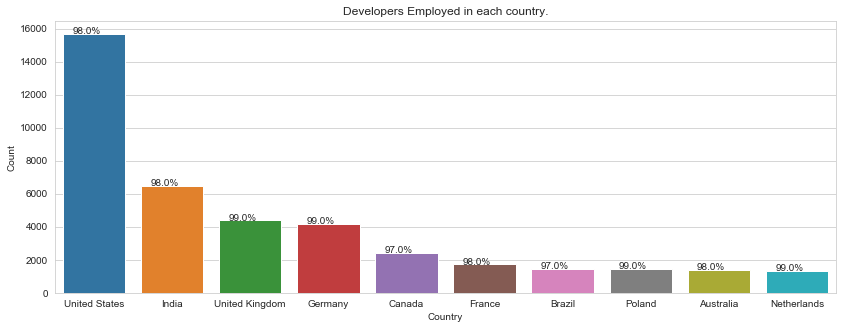

In [22]:
_ = plt.figure(figsize=(14,5))
g = sns.barplot(x=country,y=values)
for i,j in zip(g.patches,country):
    _ = g.text(i.get_x()+.12,i.get_height()+.3,str(round((i.get_height()/country_data[j])*100))+'%')
_ = plt.title('Developers Employed in each country.')
_ = plt.xlabel('Country')
_ = plt.ylabel('Count')

The above graph clearly shows that the top 10 countries having most number of surveyees also has 95-99% of the surveyees employed.

# Highest Education Level of the Developers in the Record and their Major's
Description - Which of the following best describes the highest level of formal education that you’ve completed?

In [23]:
data_dev['EdLevel'].value_counts().sort_values(ascending=False)

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              32582
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           15936
Some college/university study without earning a degree                                 7376
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     3373
Associate degree                                                                       2157
Other doctoral degree (Ph.D, Ed.D., etc.)                                              1468
Professional degree (JD, MD, etc.)                                                      891
Primary/elementary school                                                               331
I never completed any formal education                                                  312
Name: EdLevel, dtype: int64

In [24]:
data_dev['UndergradMajor'].value_counts().sort_values(ascending=False)

Computer science, computer engineering, or software engineering          39886
Another engineering discipline (ex. civil, electrical, mechanical)        4469
Information systems, information technology, or system administration     3922
Web development or web design                                             2701
A natural science (ex. biology, chemistry, physics)                       2125
Mathematics or statistics                                                 2103
A humanities discipline (ex. literature, history, philosophy)             1143
A business discipline (ex. accounting, finance, marketing)                1142
Fine arts or performing arts (ex. graphic design, music, studio art)       924
A social science (ex. anthropology, psychology, political science)         883
I never declared a major                                                   659
A health science (ex. nursing, pharmacy, radiology)                        152
Name: UndergradMajor, dtype: int64

From the above outputs, we can easily infer that most of the developers have a bachelors degree and major in Computer science, computer engineering, or software engineering.

# List the most common types of developers present in the industry?
Now we shall see the most common types of developers (front end, back end) in the industry.  
Let's see the most common types of developers present in the industry.

In [25]:
from collections import Counter
types=[]
a=data_dev['DevType'].dropna().values.tolist()
# The below for loop extracts the type of developers, the main reason
# behind using this for loop is that one row of devtype columns contains several types
# and it will be better to see each type individually instead in a collection
for i in a:
    x=i.split(';')
    for j in x:
        types.append(j)

developer_type=Counter(types) # A counter object counts the occurence of each string in a list.
# In this case we are counting the number of full-stack, front-end, back-end developers and so on.
del developer_type['Developer'] # Since we are only considering data of developers, so we need not consider the string Developer
print('Top 10 most common types of developers:-')
for i in developer_type.most_common(10): 
    print(i[0].strip(),':',i[1])

Top 10 most common types of developers:-
Developer, full-stack : 37654
Developer, back-end : 35325
Developer, front-end : 22727
Developer, desktop or enterprise applications : 14849
Developer, mobile : 12392
Database administrator : 7573
DevOps specialist : 7542
Designer : 6622
System administrator : 6254
Developer, embedded applications or devices : 6027


We see that the most common types of developers are:-
- Full-Stack, Front-end, or Back-end developers
- Mobile Application Developers
- Database Administrator.  

Thus we can infer that there is a common trend of choosing to be a full-stack developer

# Median Salary by Developer type

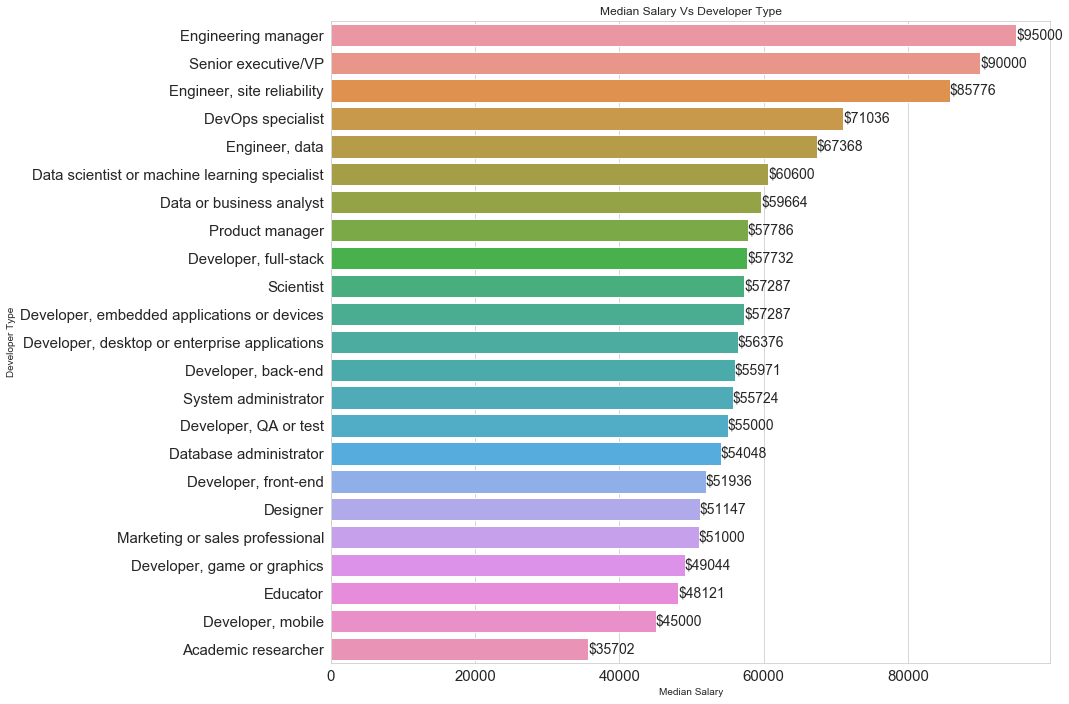

In [26]:
types=[]
a=data_dev['DevType'].dropna().values.tolist()
# The below for loop extracts the type of developers, the main reason
# behind using this for loop is that one row of devtype columns contains several types
# and it will be better to see each type individually instead in a collection
for i in a:
    x=i.split(';')
    for j in x:
        types.append(j)
        
types=np.unique(np.array(types,dtype='object'))
devType=[]
medianSalary=[]
for i in types:#np.nditer(types,flags=['refs_ok']):
    if i=='Student':
        continue
    d = data_dev['DevType'].dropna().str.contains(i)
    tmp = data_dev.dropna(subset=['DevType'])[d]
    # medianSalary.append('$'+str(tmp['ConvertedComp'].median()))
    medianSalary.append(tmp['ConvertedComp'].median())
    devType.append(i)
devVsSalary = pd.DataFrame({'Developer Type':devType,'Median Salary':medianSalary}).sort_values('Median Salary',ascending=False)

_ = plt.figure(figsize=(15,10))
g = sns.barplot(y='Developer Type',x='Median Salary',data=devVsSalary)
_ = plt.title('Median Salary Vs Developer Type')
_ = plt.yticks(fontsize=15)
_ = plt.xticks(fontsize=15)
for i in g.patches:
    _ = g.text(i.get_width()+.2,i.get_y()+.4,'$'+str(int(round(i.get_width(),0))),fontsize=14,verticalalignment='center')
plt.tight_layout(pad=1.5)

- Engineering managers, SREs, DevOps specialists, and data scientists/engineers command the highest salaries.  
Note: This data depends upon the input by the surveyees.

# Since how many years have the surveyees been coding as a profession?

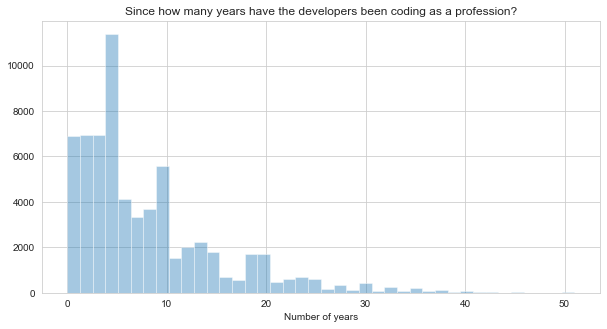

In [27]:
yearsCoded=data_dev['YearsCodePro']
yearsCoded.replace('Less than 1 year',0,inplace=True)
yearsCoded.replace('More than 50 years',51,inplace=True)
yearsCoded=yearsCoded.astype('float')
m=yearsCoded.mean()
yearsCoded=yearsCoded.fillna(m)

_ = plt.figure(figsize=(10,5))
_ = sns.distplot(yearsCoded,kde=False,bins=40)
_ = plt.title('Since how many years have the developers been coding as a profession?')
_ = plt.xlabel('Number of years')

# At what age did the surveyees wrote their first line of code?

In [28]:
age1stCode=data_dev['Age1stCode'].replace('Younger than 5 years',5) # Here, we are replacing 
age1stCode.replace('Older than 85',85,inplace=True)

age1stCode=age1stCode.astype('float')
m=age1stCode.mean()
age1stCode = age1stCode.fillna(m)
age1stCode=age1stCode.astype('int')

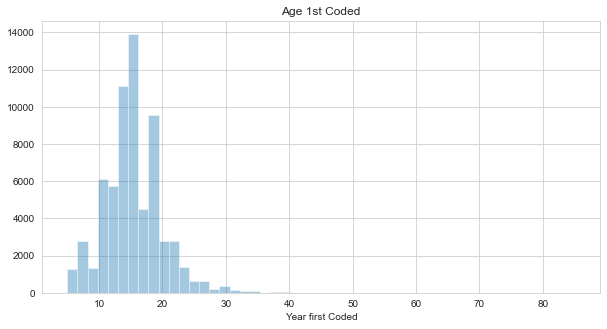

In [29]:
_ = plt.figure(figsize=(10,5))
g = sns.distplot(age1stCode,kde=False)
_ = plt.xlabel('Year first Coded')
_ = plt.title('Age 1st Coded')

In [30]:
print('The youngest age when a developer started coding:',age1stCode.min())
print('The average age at which developers wrote their first line of code:',int(round(age1stCode.mean(),0)))

The youngest age when a developer started coding: 5
The average age at which developers wrote their first line of code: 15


# Career Satisfaction of the surveyees

In [31]:
data_dev['CareerSat'].value_counts()

Very satisfied                        26649
Slightly satisfied                    22479
Slightly dissatisfied                  6665
Neither satisfied nor dissatisfied     6256
Very dissatisfied                      3360
Name: CareerSat, dtype: int64

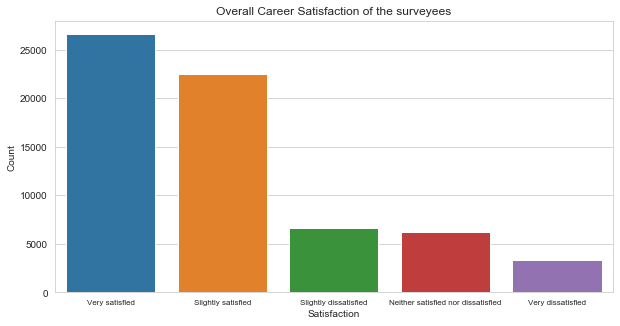

In [32]:
career_sat = data_dev['CareerSat'].value_counts().sort_values(ascending=False)
_ = plt.figure(figsize=(10,5))
_ = sns.barplot(x=career_sat.index,y=career_sat.values)
_ = plt.xticks(fontsize=8)
_ = plt.title('Overall Career Satisfaction of the surveyees')
_ = plt.xlabel('Satisfaction')
_ = plt.ylabel('Count')

We see that majority of the surveyees are satisfied with their careers. For a more detailed analysis, let's see the satisfaction of developers country wise. 
Since **Country** and **CareerSat** both are categorical data, we need to convert CareerSat to a numerical data so that a graph can be plotted.  
A great way to do this would be assigning the unique values in CareerSat with marks, example:-  
- Very Satisfied: 7
- Slightly Satisfied: 4
- Neither satisfied nor dissatisfied: 1
- Slightly Dissatisfied: -2
- Very Dissatisfied: -5  

We will be penalising Slightly Dissatisfied and Very Dissatisfied records with -2 and -5 as I think this will help us have a clear view of the career satisfaction of the developers in each country.

In [33]:
career_sat_df = data_dev.replace({'Very satisfied':7,'Slightly satisfied':4,'Neither satisfied nor dissatisfied':1,'Slightly dissatisfied':-2,'Very dissatisfied':-5})
career_sat_df['CareerSat']=career_sat_df['CareerSat'].fillna(0)
career_sat_df['CareerSat']=career_sat_df['CareerSat'].astype('int')

Now, the careerSat values have been replaced by their decided marks. Now lets plot a graph between Country and CareerSat to see the result.

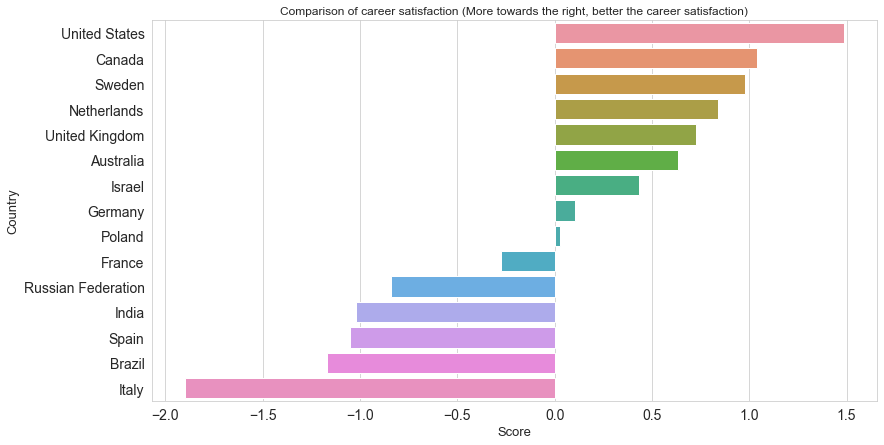

In [34]:
country = data_dev.dropna(subset=['CareerSat'])['Country'].value_counts() # First dropping all rows where there is no CareerSat mentioned,
# then doing value_counts on country
a = data_dev['Country'].value_counts()>700 # Filtering out those countries having less than 700 surveyees
country=country[a] # Filtering out those countries having less than 700 surveyees
country_list = country.index.tolist() # Extracting list of countries having more than 700 surveyees
country = country.reset_index().rename(columns={'Country':'#Surveyees','index':'Country'}) # Changing to df and renaming columns

career = career_sat_df[career_sat_df['Country'].isin(country_list)].groupby('Country')['CareerSat'].sum().sort_values(ascending=False).\
reset_index()
# Computing sum of CareerSat marks in each country present in country_list

career_sat_marks = career.merge(country,on='Country') # merging the career df containing careersat scores of each country and country which
# contains total number of surveyees from each country 

career_sat_marks['Total Marks']=career_sat_marks['#Surveyees']*7 # total score is # of surveyees * 7 (7 is score for very satisfied)
career_sat_marks['Ratio of CareerSat and Total']=career_sat_marks['CareerSat']/career_sat_marks['Total Marks'] # finding the ratio
ratio_mean=career_sat_marks['Ratio of CareerSat and Total'].mean() # finding mean of ration
ratio_std=career_sat_marks['Ratio of CareerSat and Total'].std() # finding std of ratio
career_sat_marks['z score'] = (career_sat_marks['Ratio of CareerSat and Total']-ratio_mean)/ratio_std # computing z score of ratios
career_sat_marks=career_sat_marks.sort_values('z score',ascending=False)

_ = plt.figure(figsize=(13,7))
_ = sns.barplot(y='Country',x='z score',data=career_sat_marks)
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)
_ = plt.title('Comparison of career satisfaction (More towards the right, better the career satisfaction)')
_ = plt.ylabel('Country',fontsize=13)
_ = plt.xlabel('Score',fontsize=13)

From the above graph, it looks like surveyees based in United States are, in general, very satisfied by their careers.  
However, it is sad to see the surveyees based in India are, in general, not that satisfied with their careers

# What are the things asked to be done during a interview?

In [35]:
job_interview_questions = []
job_interview_rounds = data_dev['LastInt'].dropna()
for i in job_interview_rounds.values.tolist():
    tmp = i.split(';')
    for j in tmp:
        if j=='Write code by hand (e.g., on a whiteboard)':
            job_interview_questions.append('Write any code')
        else:
            job_interview_questions.append(j.strip())
job_interview_questions_counter = Counter(job_interview_questions)
for i,j in job_interview_questions_counter.most_common():
    print(i,':',j)

Interview with people in senior / management roles : 48756
Write any code : 42782
Interview with people in peer roles : 37035
Complete a take-home project : 15306
Solve a brain-teaser style puzzle : 11851


Seeing the above output, we get to know that most in most of the job interviews, The developers have been asked to:-
- Interview with people in senior/management/peer roles
- Write code.

# While deciding on taking up a job, which factors about the job are important for the developers?

In [36]:
factors=[]
for i in data_dev['JobFactors'].dropna().values.tolist():
    c=i.split(';')
    for j in c:
        factors.append(j.strip())

In [37]:

factors_count=Counter(factors)

In [38]:
for i,j in factors_count.most_common():
    print(i,':',j)

Languages, frameworks, and other technologies I'd be working with : 36728
Office environment or company culture : 31415
Flex time or a flexible schedule : 29856
Opportunities for professional development : 27620
Remote work options : 21262
How widely used or impactful my work output would be : 14760
Industry that I'd be working in : 8895
Financial performance or funding status of the company or organization : 8889
Specific department or team I'd be working on : 7701
Diversity of the company or organization : 4212


From the above output, we see that the most important factors favoring one job over another are:-  
- The type of Language, frameworks and other technologies that the developer will be working with
- Office Environment
- Flexible schedule
- Opportunities for professional development
- Remote Work options  

Hence, the above factors are, in general, considered to be very important by the surveyees while looking for a job.

# What is the median salary of the developers country wise? (in USD)

In [39]:
country = data_dev.dropna(subset=['ConvertedComp'])['Country'].value_counts() # First dropping all rows where there is no Salary mentioned,
# then doing value_counts on country
a = data_dev['Country'].value_counts()>700 # Filtering out those countries having less than 700 surveyees
country=country[a] # Filtering out those countries having less than 700 surveyees
country_list = country.index.tolist() # Extracting list of countries having more than 700 surveyees

salary = data_dev[data_dev['Country'].isin(country_list)].dropna(subset=['ConvertedComp']).groupby('Country')['ConvertedComp'].median().sort_values(ascending=False).reset_index()
salary = salary.rename(columns={'ConvertedComp':'Median Salary in USD'})
salary['Median Salary in USD'] = salary['Median Salary in USD'].round(2)
salary

,Country,Median Salary in USD
0,United States,112260.0
1,Israel,92376.0
2,Australia,79783.0
3,Canada,68705.0
4,United Kingdom,68041.0
5,Germany,63016.0
6,Netherlands,57300.0
7,Sweden,57000.0
8,France,46752.0
9,Spain,40101.0


# What are the average weekly working hours of the developers country wise?

In [40]:
workHrs = data_dev[data_dev['Country'].isin(country_list)].groupby('Country')['WorkWeekHrs'].mean().sort_values(ascending=False).head(15).reset_index()
workHrs['WorkWeekHrs'] = workHrs['WorkWeekHrs'].round(2)
workHrs.rename(columns={'WorkWeekHrs':'Average Weekly Work Hours'},inplace=True)
workHrs

,Country,Average Weekly Work Hours
0,Sweden,47.86
1,Israel,45.27
2,Poland,45.04
3,India,42.18
4,United States,41.95
5,France,40.78
6,Russian Federation,40.62
7,Brazil,40.46
8,Spain,40.27
9,Germany,40.25


# Which is the most preferable place of work?
options include - office, home, other places such as cafe

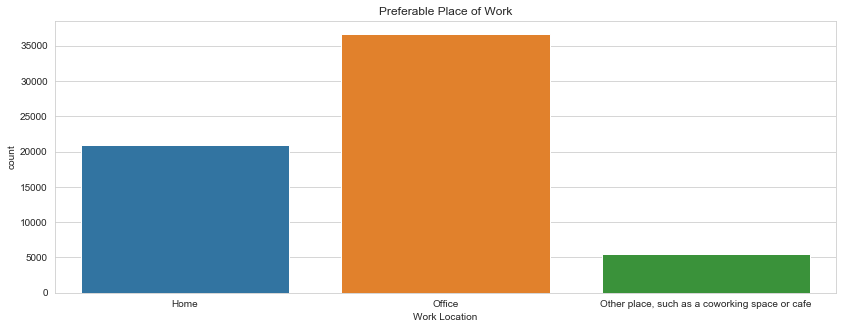

In [41]:
temp = data_dev.dropna(subset=['WorkLoc'])
_ = plt.figure(figsize=(14,5))
_ = sns.countplot(x='WorkLoc',data = temp)
_ = plt.title('Preferable Place of Work')
_ = plt.xlabel('Work Location')

# How do companies make decisions about purchasing new technology (cloud, AI, IoT, databases)?

In [42]:
data_dev['PurchaseHow'].replace('Not sure',None).value_counts().sort_values(ascending=False)

Developers and management have nearly equal input into purchasing new technology                             23501
Developers typically have the most influence on purchasing new technology                                    14664
The CTO, CIO, or other management purchase new technology typically without the involvement of developers    14352
Name: PurchaseHow, dtype: int64

From the above output, we get to know that generally, developers and management have equal input while purchasing new technology.

# Technological Trends

## Most Popular Technologies

In [43]:
# Extracting Languages
languagesWorkedWith = []
for i in data_dev['LanguageWorkedWith'].dropna().values.tolist():
    temp = i.split(';')
    for j in temp:
        languagesWorkedWith.append(j.strip())

In [44]:
languagesWorkedWith = Counter(languagesWorkedWith)

In [45]:
# Extracting Language and its popularity into index and values
a = languagesWorkedWith.most_common()
index = []
values = []
for i in a:
    language = i[0]
    popularity = i[1]
    index.append(language)
    values.append(popularity)

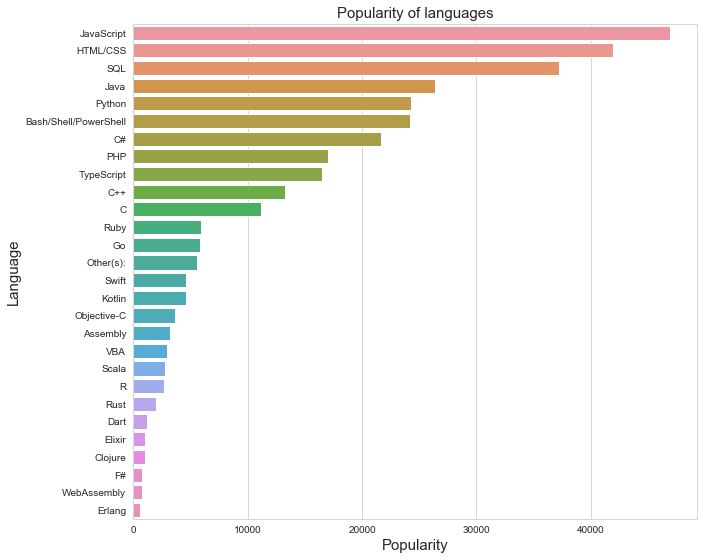

In [46]:
_ = plt.figure(figsize=(10,8))
_ = sns.barplot(y=index,x=values)
_ = plt.title('Popularity of languages',fontsize=15)
_ = plt.xlabel('Popularity',fontsize=15)
_ = plt.ylabel('Language',fontsize=15)
_ = plt.tight_layout(pad=1.5)


JavaScript, no wonder is the most popular programming language amongst developers.  
Java and Python are the 4th and 5th most popular programming language.

## Top Paying Technologies

In [47]:
# Extracting different languages
languages = []
for i in data_dev['LanguageWorkedWith'].dropna().values.tolist():
    temp = i.split(';')
    for j in temp:
        if j.strip() not in languages:
            languages.append(j.strip())

In [48]:
median_salary = []
for i in languages:
    a = data_dev['LanguageWorkedWith'].dropna().str.contains(i,regex=False,case=False)
    median = data_dev.dropna(subset=['LanguageWorkedWith'])[a]['ConvertedComp'].dropna().median()
    median_salary.append(median)

In [49]:
top_paying_technologies = pd.DataFrame()
top_paying_technologies['Language']=languages
top_paying_technologies['Salary']=median_salary
top_paying_technologies['Salary']=top_paying_technologies['Salary'].astype('int')
top_paying_technologies = top_paying_technologies.sort_values('Salary',ascending=False)

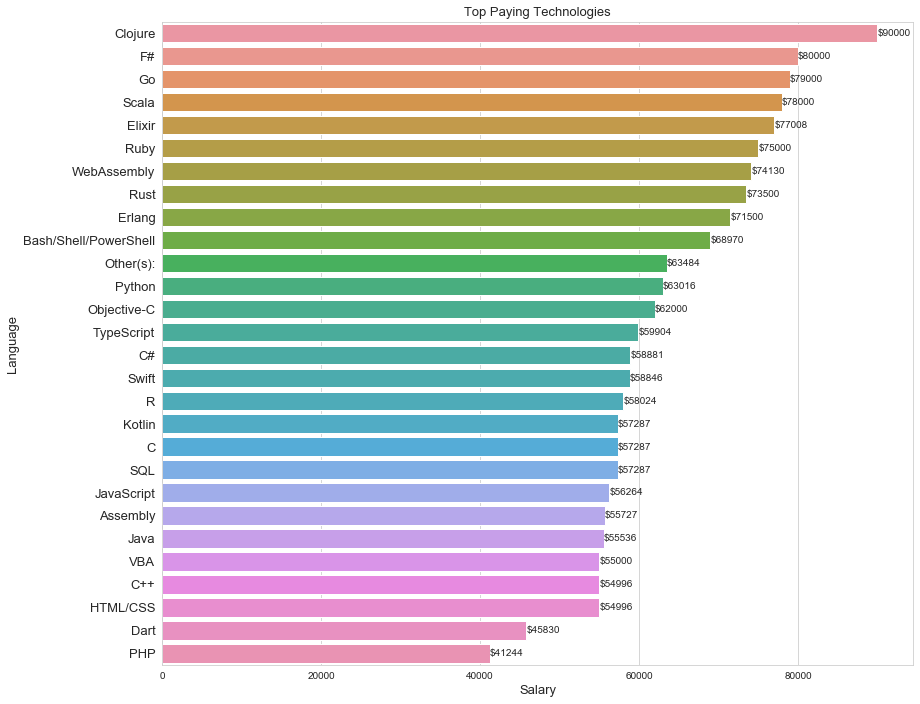

In [50]:
_ = plt.figure(figsize=(13,10))
g = sns.barplot(y='Language',x='Salary',data=top_paying_technologies)
for i in g.patches:
    _ = g.text(i.get_width()+.4,i.get_y()+.4,'$'+str(int(round(i.get_width(),0))),fontsize=10,verticalalignment='center')
_ = plt.yticks(fontsize=13)
_ = plt.title('Top Paying Technologies',fontsize=13)
_ = plt.ylabel('Language',fontsize=13)
_ = plt.xlabel('Salary',fontsize=13)
plt.tight_layout(pad=1.5)

According to the graph, people knowing clojure have the highest salary, followed by F#, Go, Scala.  
On the other hand, people experienced with Python, Java, C++ have salaries in the range of 40k-60K

## Popular Databases in the Software Industry

In [51]:
# Extracting Languages
databaseWorkedWith = []
for i in data_dev['DatabaseWorkedWith'].dropna().values.tolist():
    temp = i.split(';')
    for j in temp:
        databaseWorkedWith.append(j.strip())
databaseWorkedWith = Counter(databaseWorkedWith)
del databaseWorkedWith['Other(s):']
a = databaseWorkedWith.most_common()
index = []
values = []
for i in a:
    database = i[0]
    popularity = i[1]
    index.append(database)
    values.append(popularity)

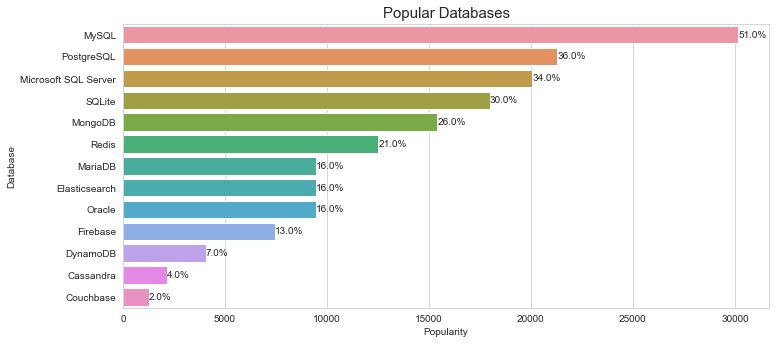

In [52]:
_ = plt.figure(figsize=(11,5))
g = sns.barplot(y=index,x=values)
for i in g.patches:
    _ = g.text(i.get_width(),i.get_y()+.4,str(round((i.get_width()/59039)*100,0))+'%',verticalalignment='center')
_ = plt.title('Popular Databases',fontsize=15)
_ = plt.ylabel('Database')
_ = plt.xlabel('Popularity')
plt.tight_layout(pad=1.5)

## Popular Development Platforms

In [53]:
developmentPlatforms = []
for i in data_dev['PlatformWorkedWith'].dropna().values.tolist():
    temp = i.split(';')
    for j in temp:
            developmentPlatforms.append(j.strip())
# for i in data_dev['MiscTechWorkedWith'].dropna().values.tolist():
#     temp = i.split(';')
#     for j in temp:
#         developmentPlatforms.append(j.strip())

In [54]:
developmentPlatforms = Counter(developmentPlatforms)
index = []
values = []
for i in developmentPlatforms.most_common():
    platform = i[0]
    popularity = i[1]
    index.append(platform)
    values.append(popularity)

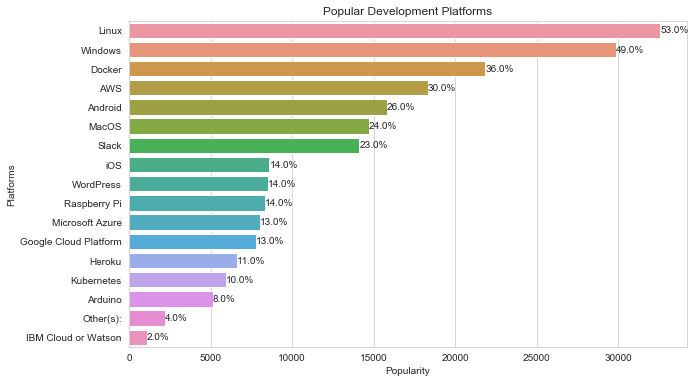

In [55]:
_ = plt.figure(figsize=(10,6))
g = sns.barplot(y=index,x=values)
for i in g.patches:
    _ = g.text(i.get_width(),i.get_y()+.4,str(round((i.get_width()/61222)*100,0))+'%',verticalalignment='center')
_ = plt.title('Popular Development Platforms')
_ = plt.ylabel('Platforms')
_ = plt.xlabel('Popularity')

Linux is the most loved Development Platform, followed by Windows, Docker, AWS, and Android

## Popular Development Environments/IDEs used by the Developers

In [56]:
devEnviron = []
for i in data_dev['DevEnviron'].dropna().values.tolist():
    temp = i.split(';')
    for j in temp:
            devEnviron.append(j.strip())

In [57]:
devEnviron = Counter(devEnviron)

In [58]:
index = []
values = []
for i in devEnviron.most_common():
    index.append(i[0])
    values.append(i[1])

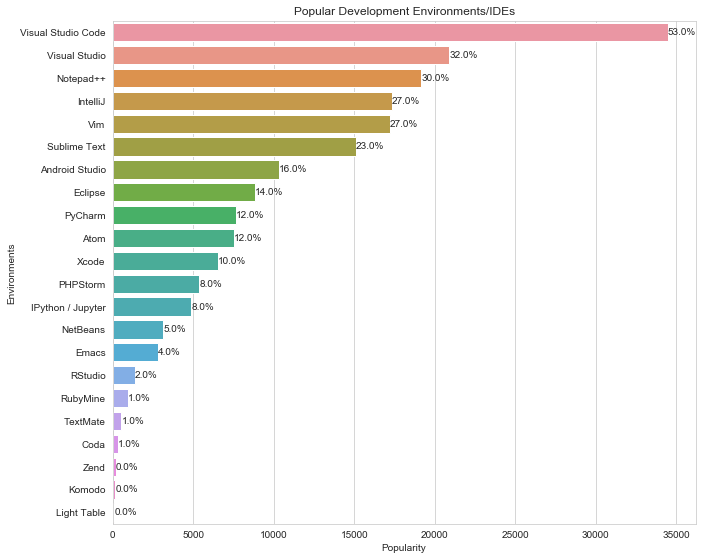

In [59]:
_ = plt.figure(figsize=(10,8))
g = sns.barplot(y=index,x=values)
for i in g.patches:
    _ = g.text(i.get_width(),i.get_y()+.4,str(round((i.get_width()/65004)*100,0))+'%',verticalalignment='center')
_ = plt.title('Popular Development Environments/IDEs')
_ = plt.ylabel('Environments')
_  =plt.xlabel('Popularity')
plt.tight_layout(pad=1.5)

## Popular Operating Systems used by Developers

In [60]:
data_dev['OpSys'].value_counts()

Windows        29235
MacOS          19614
Linux-based    16245
BSD               64
Name: OpSys, dtype: int64

About half of the surveyees said they mainly use Windows, and the remainder were about evenly split between MacOS and Linux.

## Where is container technology mainly used in the industry?

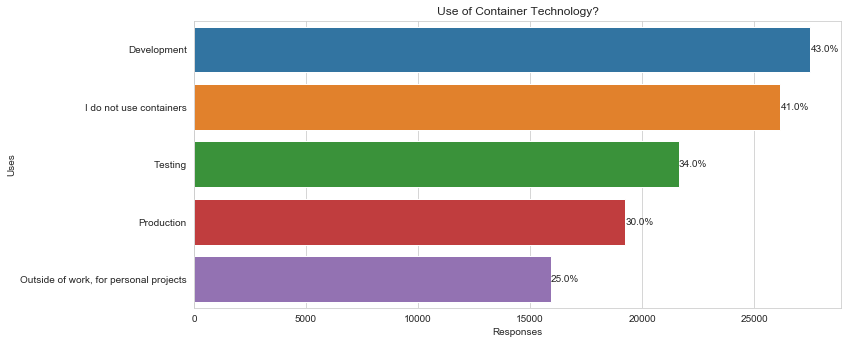

In [61]:
container = []
for i in data_dev['Containers'].dropna().values.tolist():
    temp = i.split(';')
    for j in temp:
            container.append(j.strip())
container =  Counter(container).most_common()
index=[]
values=[]
for i,j in container:
    index.append(i)
    values.append(j)
_ = plt.figure(figsize=(12,5))
g = sns.barplot(y=index,x=values)
for i in g.patches:
    _ = g.text(i.get_width(),i.get_y()+.4,str(round((i.get_width()/63886)*100,0))+'%',verticalalignment='center')
_ = plt.title('Use of Container Technology?')
_ = plt.xlabel('Responses')
_ = plt.ylabel('Uses')
plt.tight_layout(pad=1.5)

# Analysis on usage of Blockchain

In [62]:
data_dev['BlockchainOrg'].value_counts()

Not at all                                                 33569
Non-currency applications of blockchain                     5170
Implementing cryptocurrency-based products                  1669
Accepting Bitcoin or other coins and tokens as payments      791
Implementing our own cryptocurrency                          543
Name: BlockchainOrg, dtype: int64